In [1]:
import pandas as pd

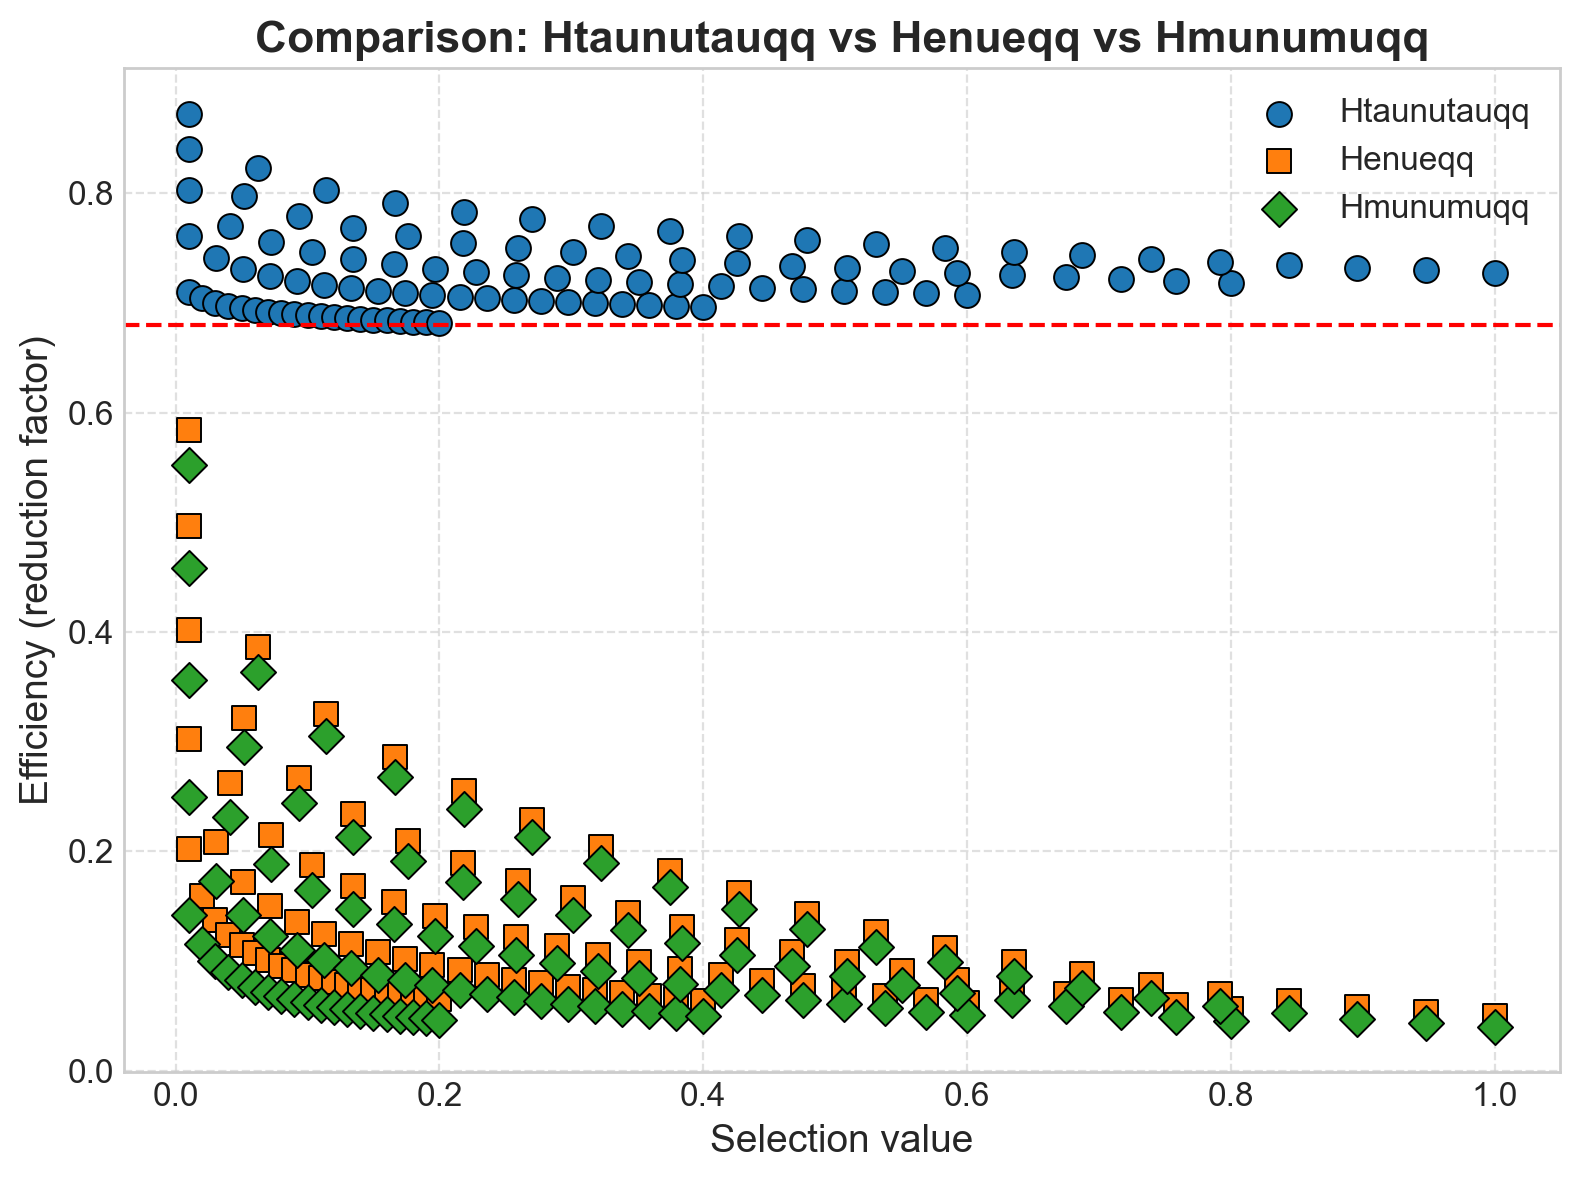

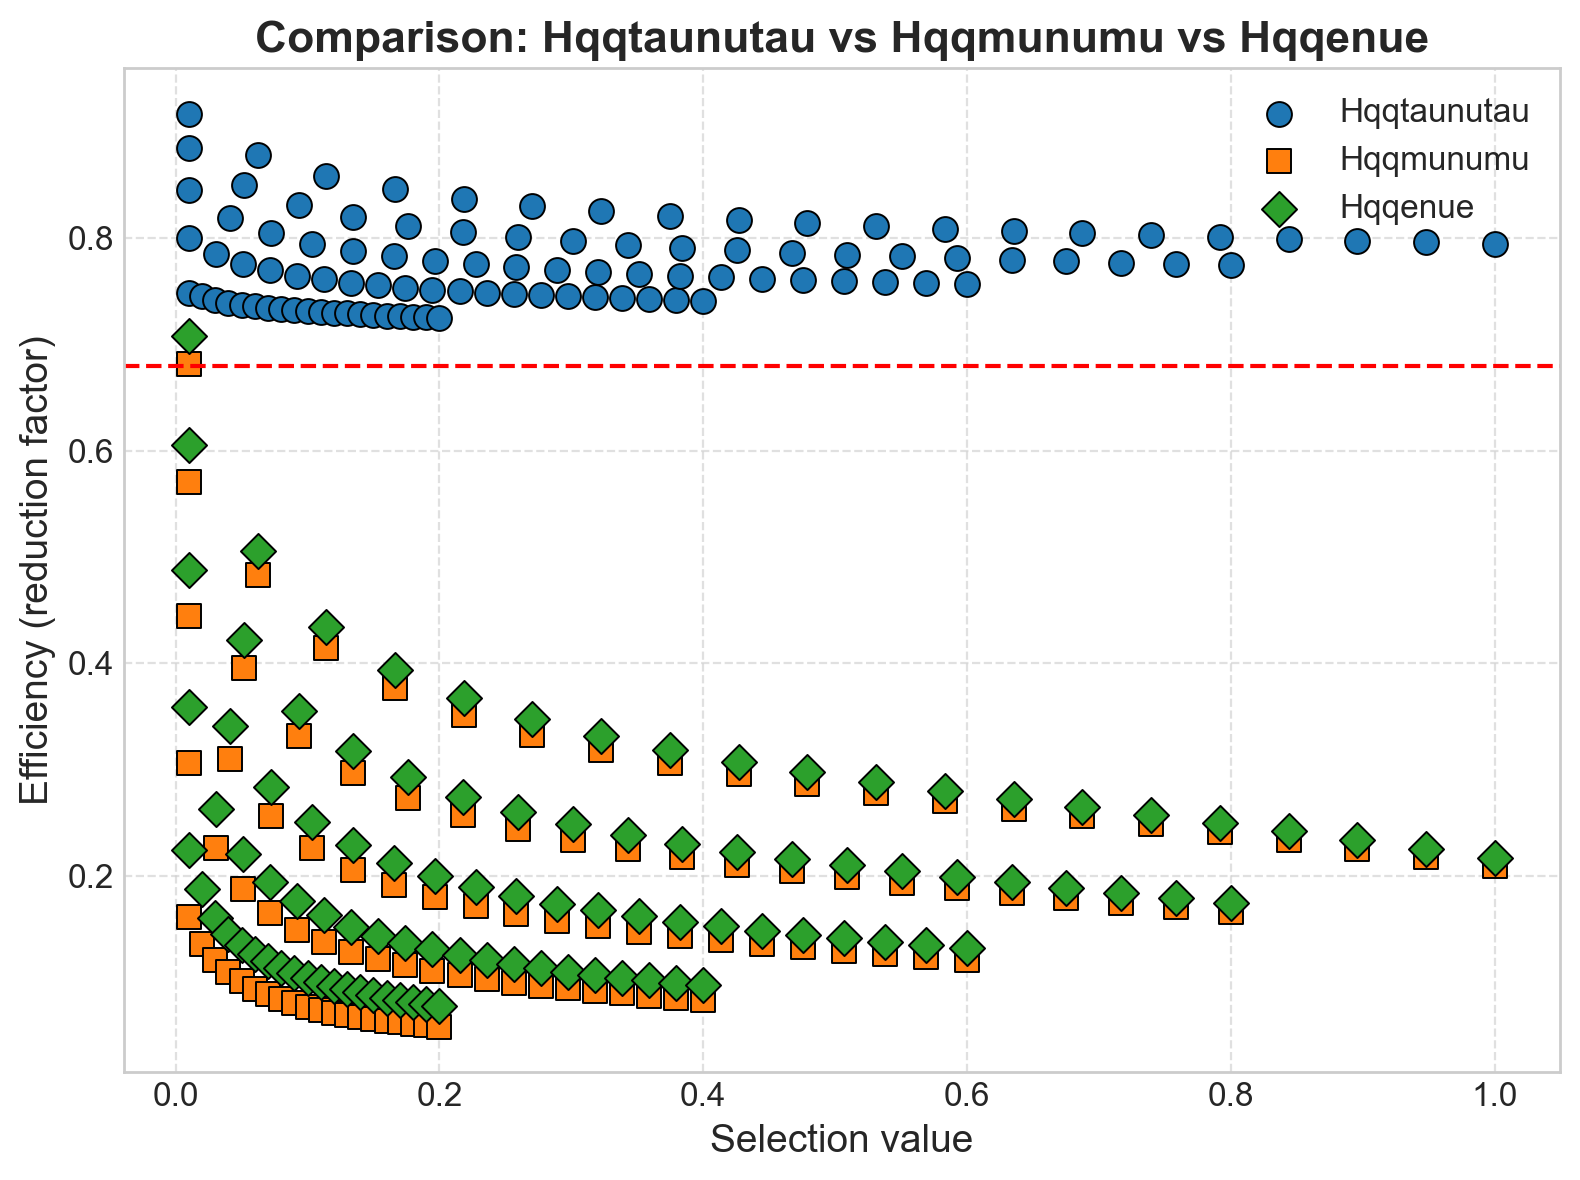

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
url = "https://raw.githubusercontent.com/Apranikstar/FCC-ecm125-codes/main/coneIsolation/resultsCSVCone.csv"
df = pd.read_csv(url)

# Extract clean process names
df["process"] = (df["output_file"]
                  .str.replace("wzp6_ee_", "", regex=False)
                  .str.replace("_ecm125.root", "", regex=False))

# Split into processes
processes = {proc: group.reset_index(drop=True) 
             for proc, group in df.groupby("process")}

# Nice styles
plt.style.use("seaborn-v0_8-whitegrid")
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
markers = ["o", "s", "D", "^", "v", "P"]

def plot_comparison(proc_list, title, nametoSave):
    plt.figure(figsize=(8,6), dpi=200)
    for i, proc in enumerate(proc_list):
        data = processes[proc]
        plt.scatter(data["selection"], data["reduction_factor"], 
                    s=80, color=colors[i % len(colors)], 
                    marker=markers[i % len(markers)], 
                    edgecolor="black", linewidth=0.7, label=proc)
    plt.xlabel("Selection value", fontsize=14)
    plt.ylabel("Efficiency (reduction factor)", fontsize=14)
    plt.title(title, fontsize=16, weight="bold")
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.axhline(y=0.68, color='red', linestyle='--', linewidth=1.5)

    # More ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(nametoSave)
    plt.tight_layout()
    plt.show()

# Plot 1: Htaunutauqq, Henueqq, Hmunumuqq
plot_comparison(["Htaunutauqq", "Henueqq", "Hmunumuqq"],
                "Comparison: Htaunutauqq vs Henueqq vs Hmunumuqq","onshell.png")

# Plot 2: Hqqtaunutau, Hqqmunumu, Hqqenue
plot_comparison(["Hqqtaunutau", "Hqqmunumu", "Hqqenue"],
                "Comparison: Hqqtaunutau vs Hqqmunumu vs Hqqenue","offshell.png")
